In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

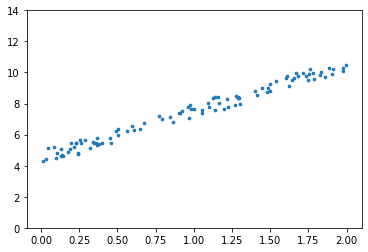

In [11]:
plt.scatter(X, y, s = 7)
plt.ylim(0, 14)
plt.show()

In [12]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[4.5214172 ],
       [3.00842639]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5214172 ],
       [10.53826998]])

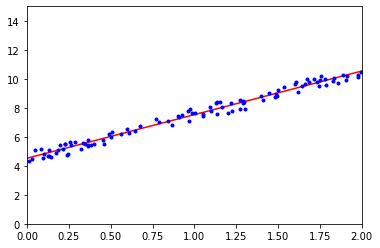

In [19]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# <span style = "color: red">The equivalent code using Scikit-Learn </span>

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.5214172]), array([[3.00842639]]))

In [27]:
lin_reg.predict(X_new)

array([[ 4.5214172 ],
       [10.53826998]])